# Customer Segmentation Using Clustring

## problem statement

## Table of Content


In [14]:
# used to suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on Numpy arrays
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns

## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [16]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.3f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

In [189]:
# read csv file using pandas
df = pd.read_csv('sales_data.csv', encoding='unicode_escape')



In [191]:
# to display the top 5 rows of the dataframe
df.sample(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
1190,10108,43,67.770,12,2914.110,3/3/2003 0:00,Shipped,1,3,2003,Motorcycles,62,S18_3782,Cruz & Sons Co.,+63 2 555 3587,15 McCallum Street - NatWest Center #13-03,NaN,Makati City,NaN,1227 MM,Philippines,Japan,Cruz,Arnold,Small
1253,10247,48,100.000,5,6756.000,5/5/2004 0:00,Shipped,2,5,2004,Classic Cars,143,S18_4027,Suominen Souveniers,+358 9 8045 555,"Software Engineering Center, SEC Oy",NaN,Espoo,NaN,FIN-02271,Finland,EMEA,Suominen,Kalle,Medium
106,10105,50,100.000,2,7208.000,2/11/2003 0:00,Shipped,1,2,2003,Classic Cars,136,S10_4757,Danish Wholesale Imports,31 12 3555,Vinb'ltet 34,NaN,Kobenhavn,NaN,1734,Denmark,EMEA,Petersen,Jytte,Large
674,10349,38,100.000,8,6719.540,12/1/2004 0:00,Shipped,4,12,2004,Classic Cars,163,S18_2238,Muscle Machine Inc,2125557413,4092 Furth Circle,Suite 400,NYC,NY,10022,USA,NaN,Young,Jeff,Medium
454,10181,44,100.000,6,5418.160,11/12/2003 0:00,Shipped,4,11,2003,Classic Cars,141,S18_1129,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium


## 4. Data Analysis and Preparation


In [194]:
# to display the dimension of the dataframe
df.shape

(2823, 25)

In [196]:
# to display the column names of the dataframe
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

## 4.1 Data Types and Summary Statistics 

In [199]:
# check the datatypes
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [203]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [205]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000,2823.000,2823.000,2823.000,2823.000,2823.000,2823.000,2823.000,2823.000
mean,10258.725,35.093,83.659,6.466,3553.889,2.718,7.092,2003.815,100.716
std,92.085,9.741,20.174,4.226,1841.865,1.204,3.657,0.700,40.188
min,10100.000,6.000,26.880,1.000,482.130,1.000,1.000,2003.000,33.000
25%,10180.000,27.000,68.860,3.000,2203.430,2.000,4.000,2003.000,68.000
50%,10262.000,35.000,95.700,6.000,3184.800,3.000,8.000,2004.000,99.000
75%,10333.500,43.000,100.000,9.000,4508.000,4.000,11.000,2004.000,124.000
max,10425.000,97.000,100.000,18.000,14082.800,4.000,12.000,2005.000,214.000


In [207]:
# o is an object
df.describe(include='O').T

,count,unique,top,freq
ORDERDATE,2823,252,11/14/2003 0:00,38
STATUS,2823,6,Shipped,2617
PRODUCTLINE,2823,7,Classic Cars,967
PRODUCTCODE,2823,109,S18_3232,52
CUSTOMERNAME,2823,92,Euro Shopping Channel,259
PHONE,2823,91,(91) 555 94 44,259
ADDRESSLINE1,2823,92,"C/ Moralzarzal, 86",259
ADDRESSLINE2,302,9,Level 3,55
CITY,2823,73,Madrid,304
STATE,1337,16,CA,416


## 4.2 - Missing Values 

In [388]:
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [212]:
# check for missing values
missing_values = df.isnull().sum()/len(df)*100

# print the number of missing values of each variable
print(missing_values)

ORDERNUMBER         0.000
QUANTITYORDERED     0.000
PRICEEACH           0.000
ORDERLINENUMBER     0.000
SALES               0.000
ORDERDATE           0.000
STATUS              0.000
QTR_ID              0.000
MONTH_ID            0.000
YEAR_ID             0.000
PRODUCTLINE         0.000
MSRP                0.000
PRODUCTCODE         0.000
CUSTOMERNAME        0.000
PHONE               0.000
ADDRESSLINE1        0.000
ADDRESSLINE2       89.302
CITY                0.000
STATE              52.639
POSTALCODE          2.692
COUNTRY             0.000
TERRITORY          38.045
CONTACTLASTNAME     0.000
CONTACTFIRSTNAME    0.000
DEALSIZE            0.000
dtype: float64


## 4.3 Univariate Analysis

### 4.3.1 STATUS

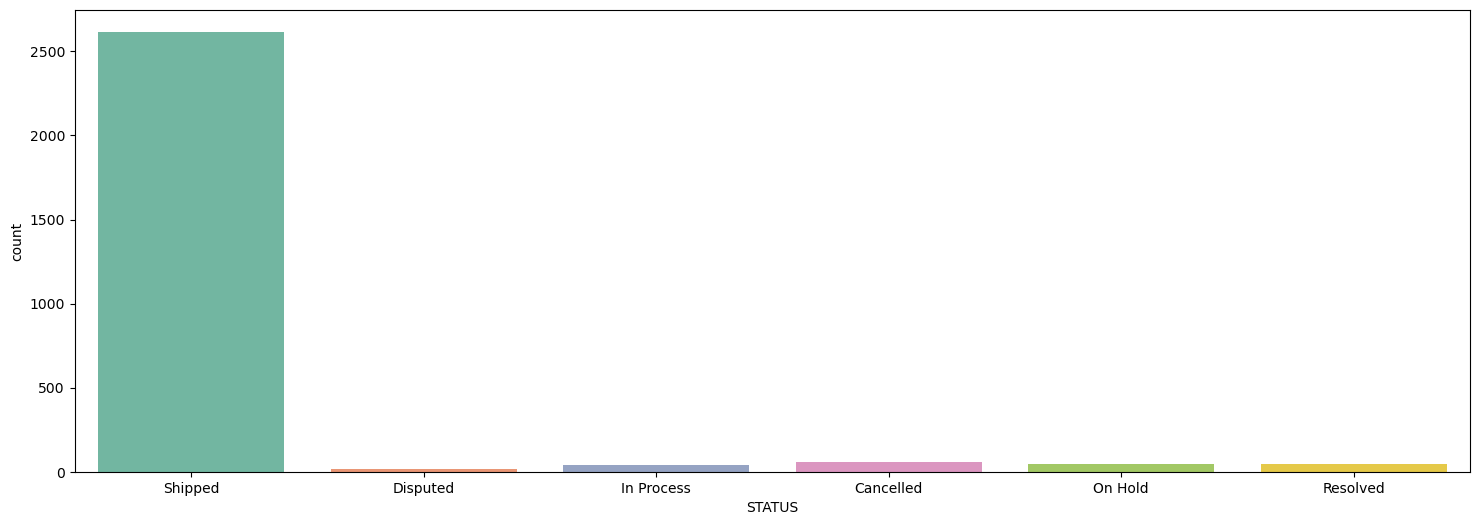

In [216]:
sns.countplot(x='STATUS',data=df, palette='Set2')
plt.show()

In [218]:
df['STATUS'] = df['STATUS'].map({'Shipped': 1, 'Cancelled': 0, 'Resolved': 0, 'On Hold': 0, 'In Process': 0, 'Disputed': 0})
sns.countplot(df['STATUS'], color = 'blue')

<Axes: ylabel='count'>

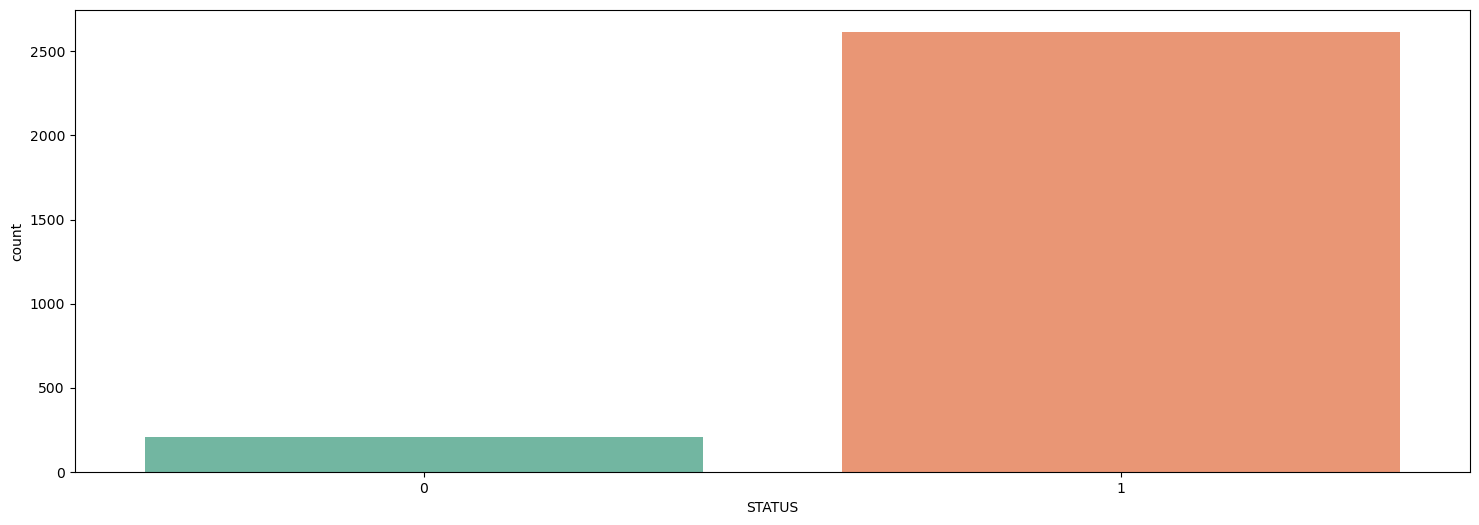

In [238]:
sns.countplot(x='STATUS', data=df, palette='Set2')
plt.show()

### 4.3.2 Convert order date to datetime format

In [221]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Check the type of data
df['ORDERDATE'].head(2)

0   2003-02-24
1   2003-05-07
Name: ORDERDATE, dtype: datetime64[ns]

### 4.3.3 COUNTRY,PRODUCTLINE,DEALSIZE

In [223]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 18,6
ax=sns.countplot(x='COUNTRY',data=df,palette='Set2')

In [224]:
ax

<Axes: xlabel='COUNTRY', ylabel='count'>

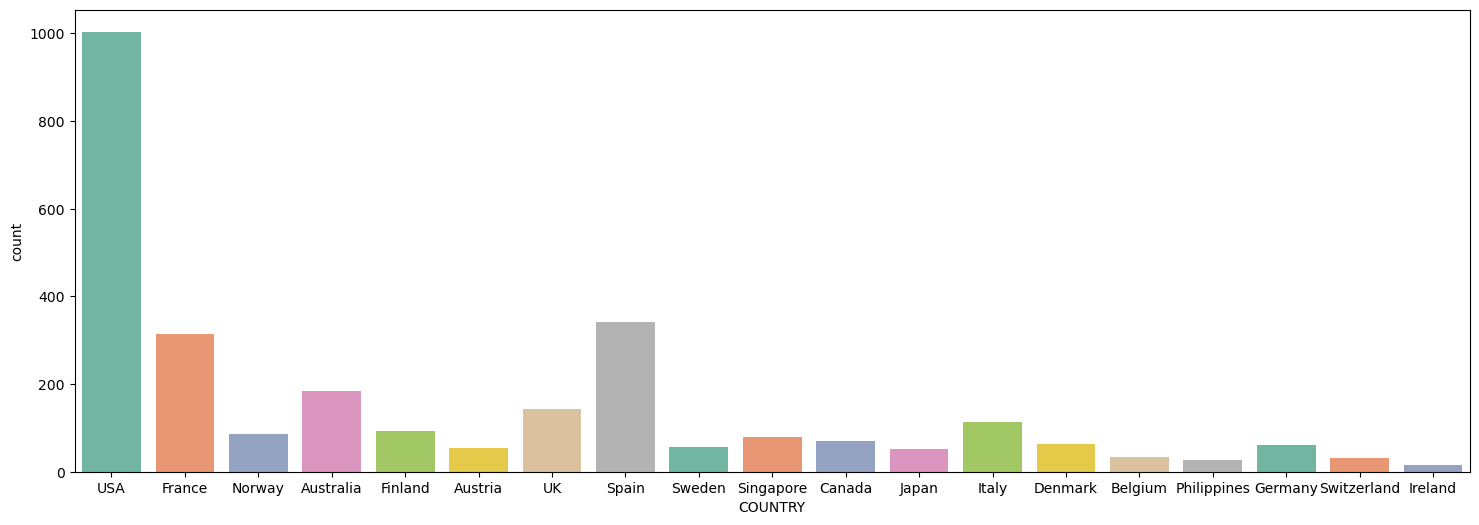

In [225]:
plt.show()

In [226]:
rcParams['figure.figsize'] = 18,6
ax=sns.countplot(x='DEALSIZE',data=df,palette='Set2')

In [227]:
ax

<Axes: xlabel='DEALSIZE', ylabel='count'>

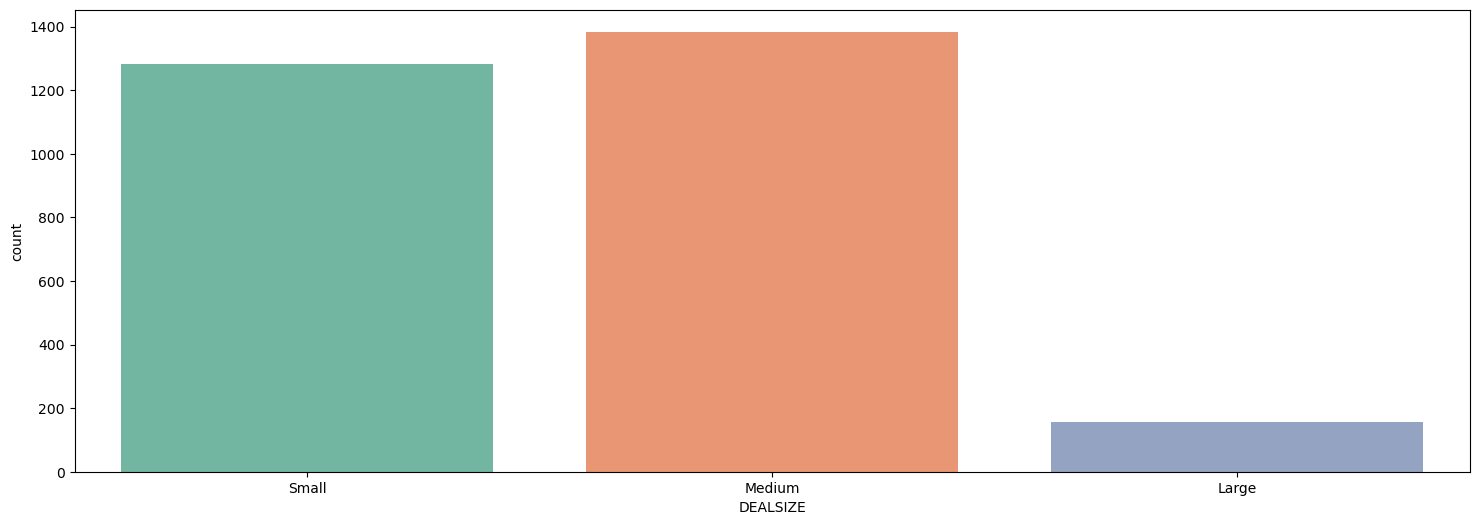

In [228]:
plt.show()

In [240]:
rcParams['figure.figsize'] = 18,6
ax=sns.countplot(x='PRODUCTLINE',data=df,palette='Set2')


In [242]:
ax

<Axes: xlabel='PRODUCTLINE', ylabel='count'>

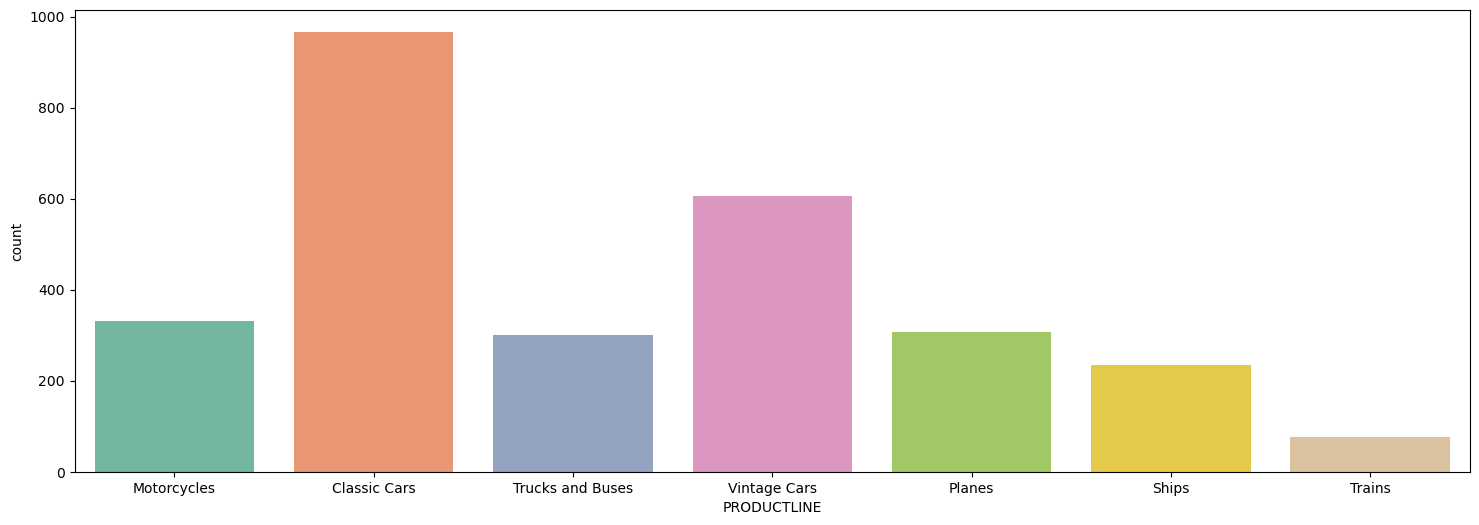

In [244]:
plt.show()

### 4.3.4 One-hot encoding categorical feature

In [247]:
dff = pd.get_dummies(data=df, columns=['PRODUCTLINE', 'DEALSIZE', 'COUNTRY'], drop_first=True)
dff.shape

(2823, 48)

In [249]:
dff.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP',
       'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2',
       'CITY', 'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'PRODUCTLINE_Motorcycles', 'PRODUCTLINE_Planes',
       'PRODUCTLINE_Ships', 'PRODUCTLINE_Trains',
       'PRODUCTLINE_Trucks and Buses', 'PRODUCTLINE_Vintage Cars',
       'DEALSIZE_Medium', 'DEALSIZE_Small', 'COUNTRY_Austria',
       'COUNTRY_Belgium', 'COUNTRY_Canada', 'COUNTRY_Denmark',
       'COUNTRY_Finland', 'COUNTRY_France', 'COUNTRY_Germany',
       'COUNTRY_Ireland', 'COUNTRY_Italy', 'COUNTRY_Japan', 'COUNTRY_Norway',
       'COUNTRY_Philippines', 'COUNTRY_Singapore', 'COUNTRY_Spain',
       'COUNTRY_Sweden', 'COUNTRY_Switzerland', 'COUNTRY_UK', 'COUNTRY_USA'],
      dtype='object')

### 4.3.5 Continuous features- QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, MSRP

In [252]:
sns.distplot(dff['SALES'], kde=True, hist=True, color='blue')

<Axes: xlabel='SALES', ylabel='Density'>

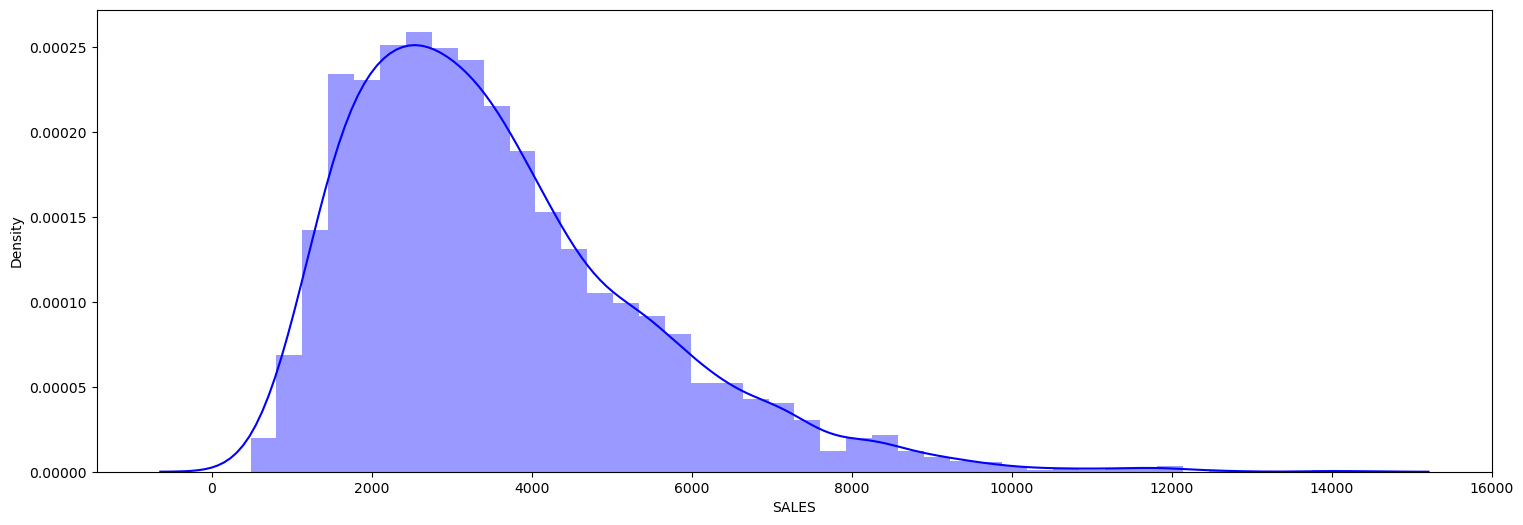

In [254]:
plt.show()

In [256]:
sns.boxplot(dff['SALES'])

<Axes: ylabel='SALES'>

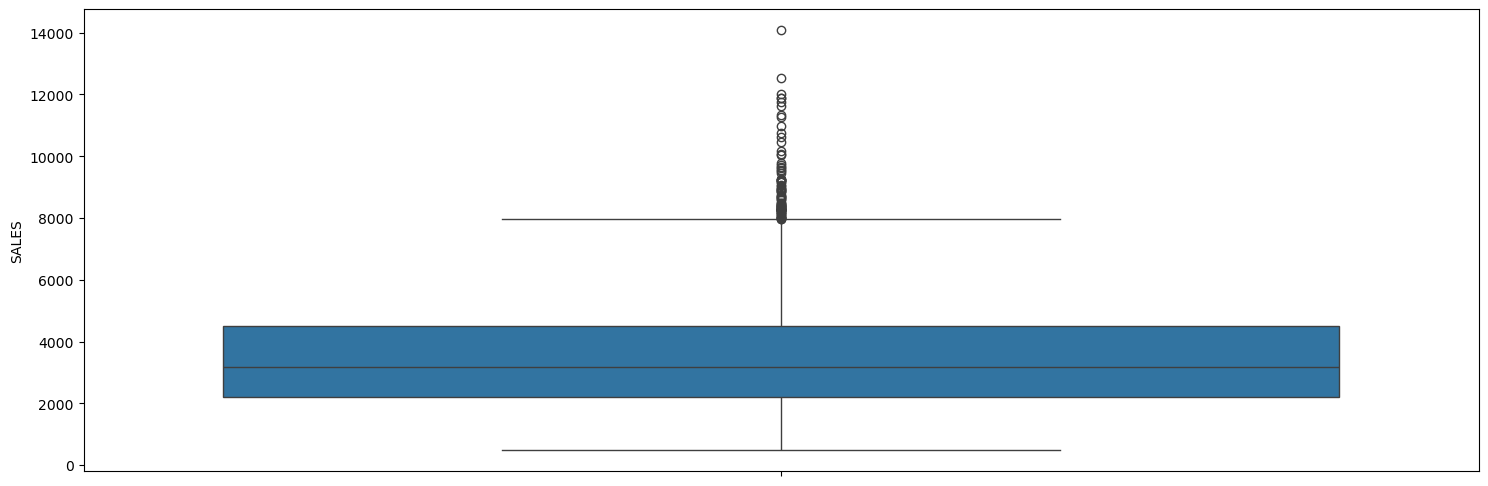

In [258]:
plt.show()

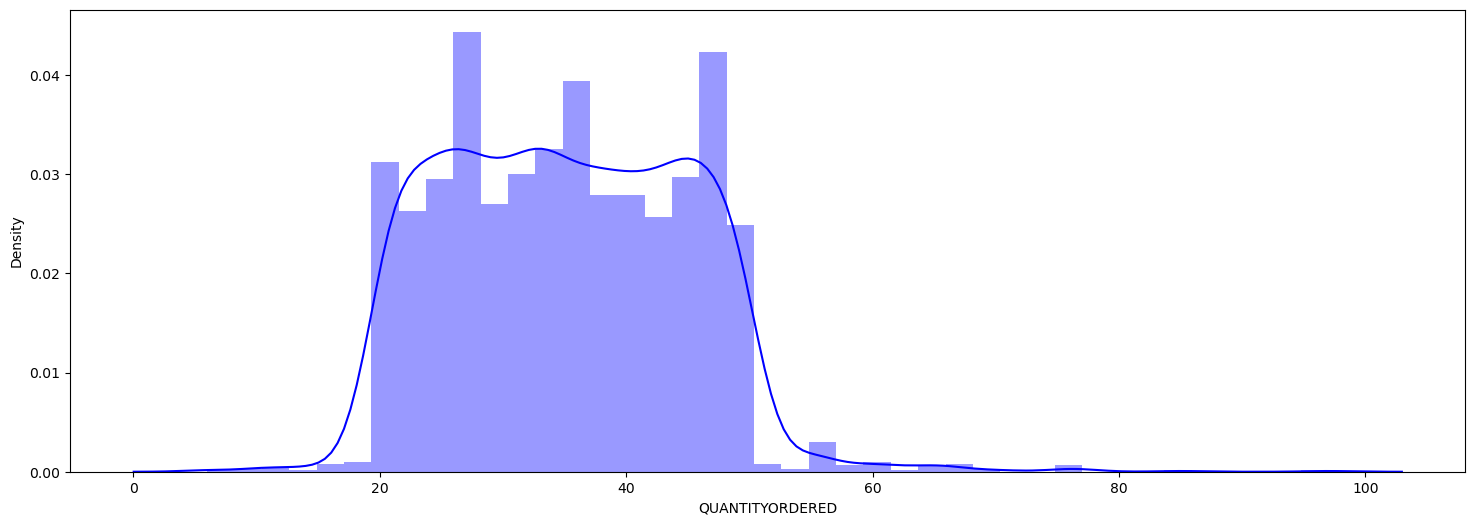

In [260]:
sns.distplot(dff['QUANTITYORDERED'], kde=True, hist=True, color='blue')
plt.show()

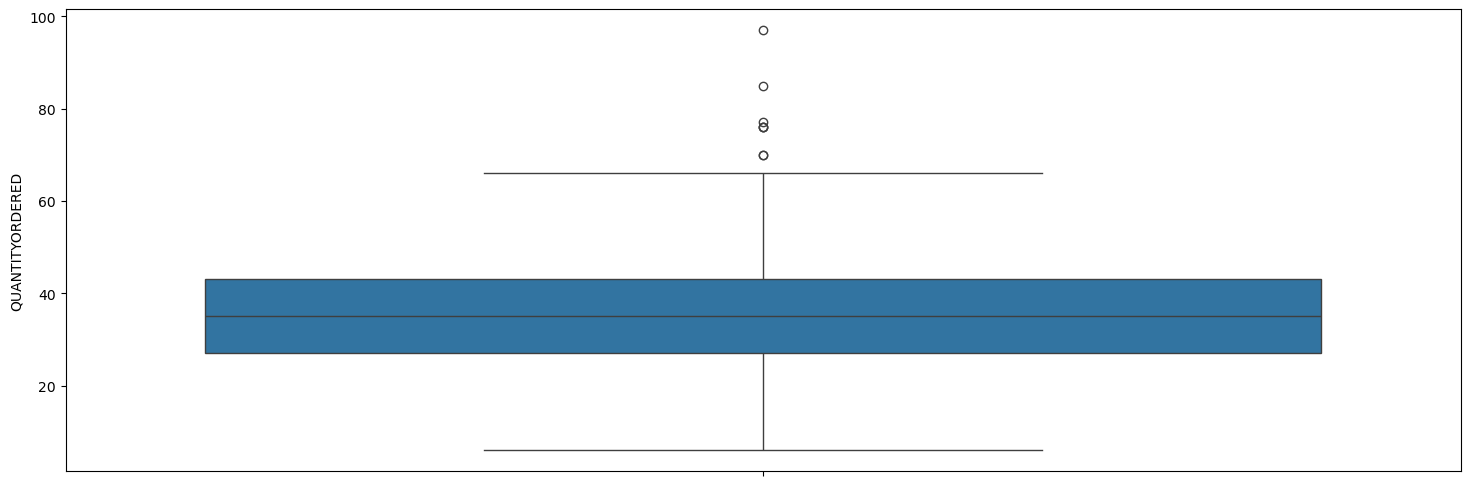

In [262]:
sns.boxplot(dff['QUANTITYORDERED'])
plt.show()

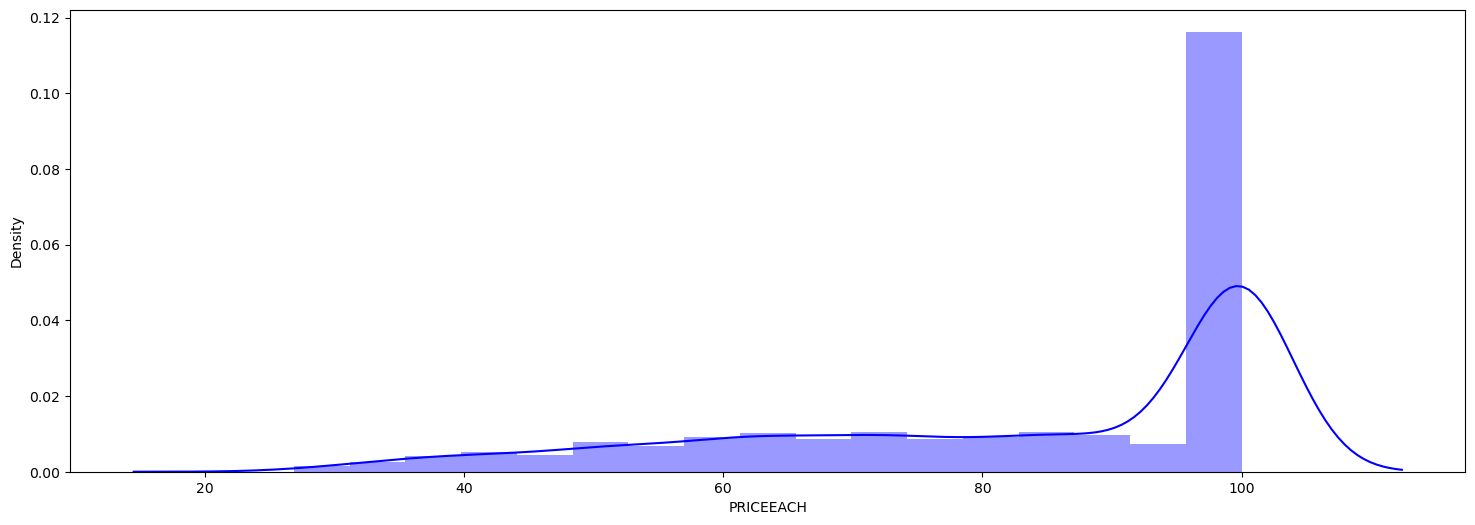

In [264]:
sns.distplot(dff['PRICEEACH'], kde=True, hist=True, color='blue')
plt.show()

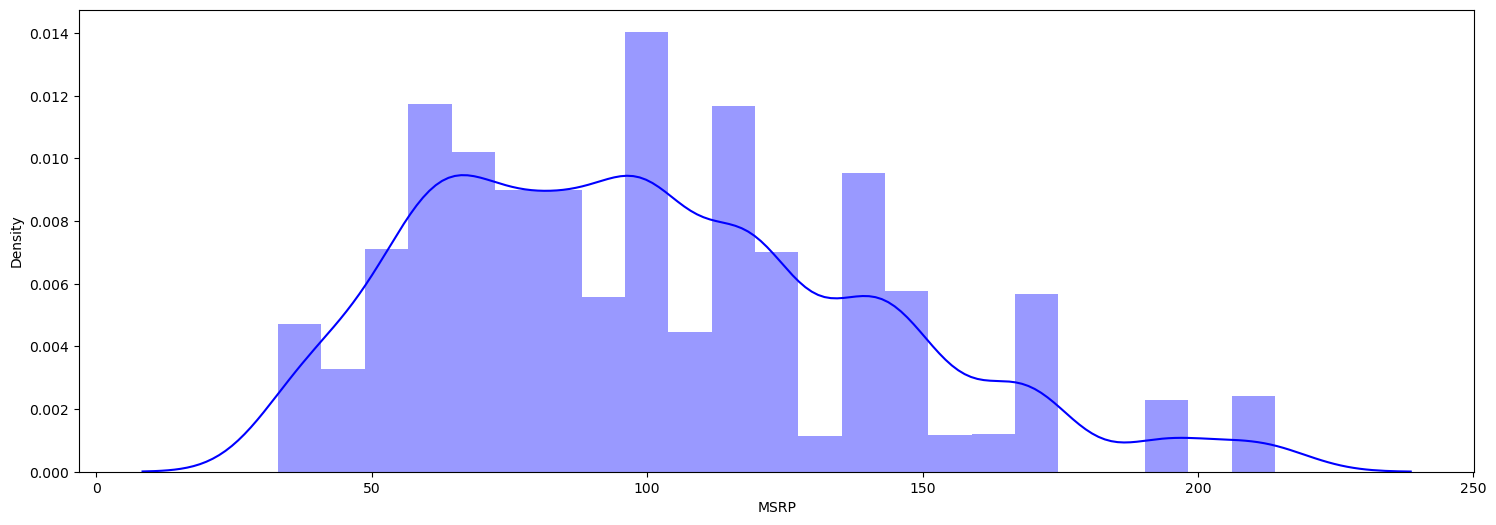

In [266]:
sns.distplot(dff['MSRP'], kde=True, hist=True, color='blue')
plt.show()

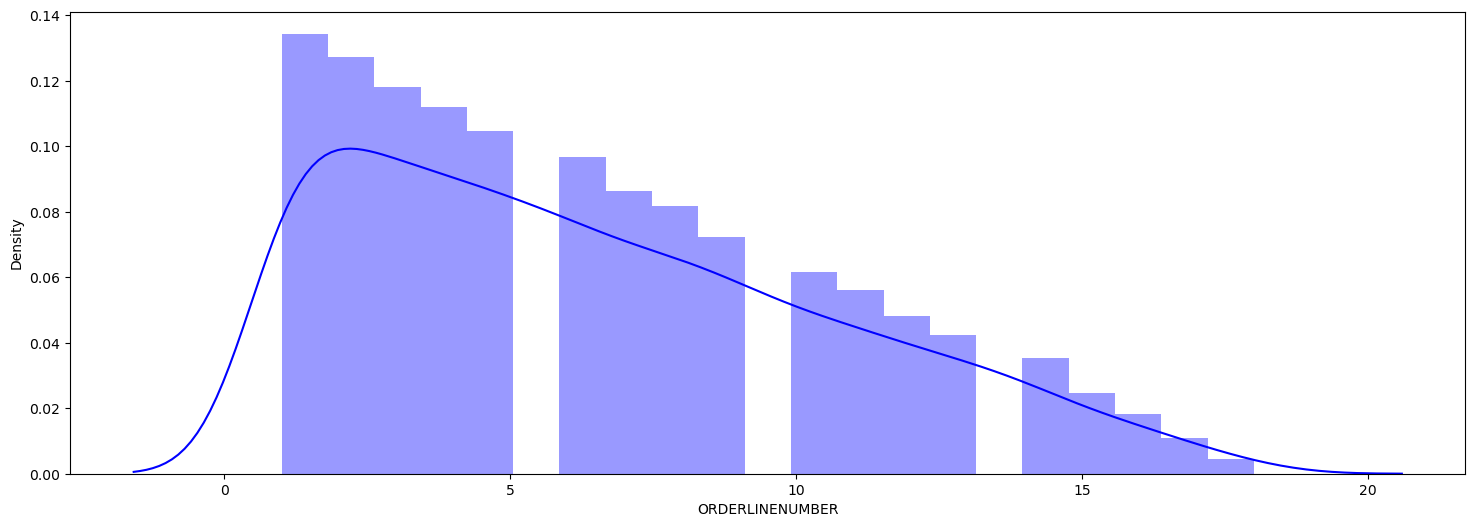

In [270]:
sns.distplot(dff['ORDERLINENUMBER'], kde=True, hist=True, color='blue')
plt.show()

## 4.4 - Bivariate Analysis & Multivariate Analysis 

### 4.4.1 Sales Vs Month

In [282]:
df.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.700,2,2871.000,2003-02-24,1,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.350,5,2765.900,2003-05-07,1,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small


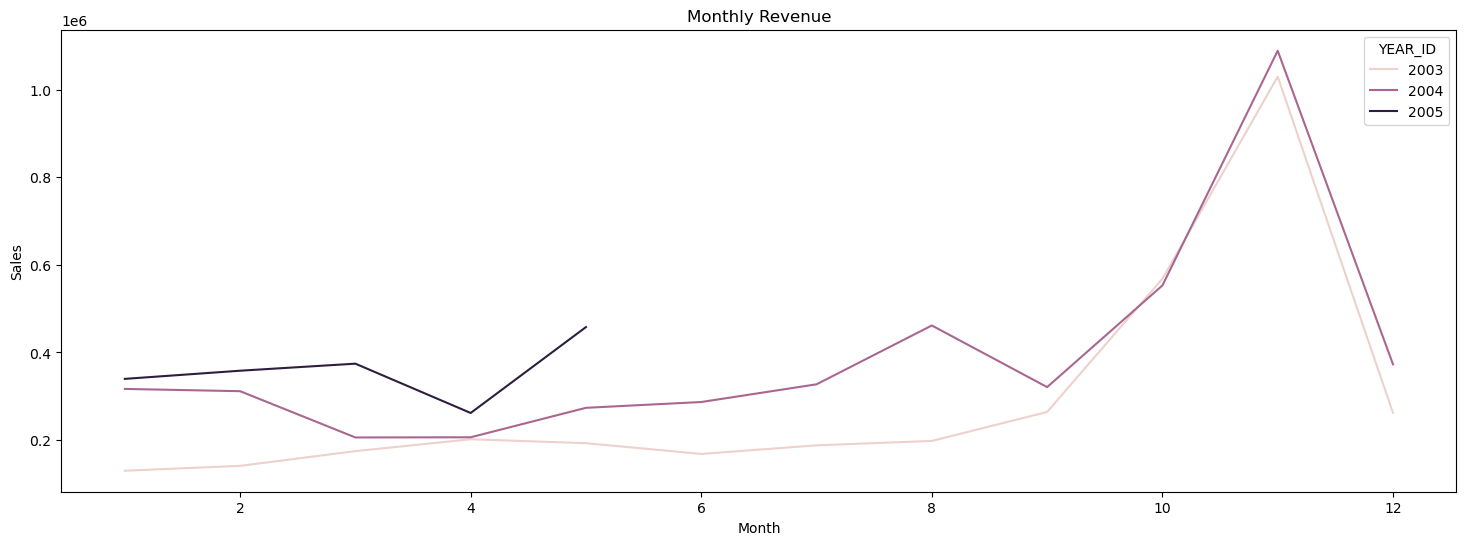

In [276]:
# Monthly Revenue
monthly_revenue = df.groupby(['YEAR_ID', 'MONTH_ID'])['SALES'].sum().reset_index()
monthly_revenue
sns.lineplot(x='MONTH_ID', y='SALES', hue='YEAR_ID', data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Revenue')
plt.show()

### 4.4.2 Sales Vs Country

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

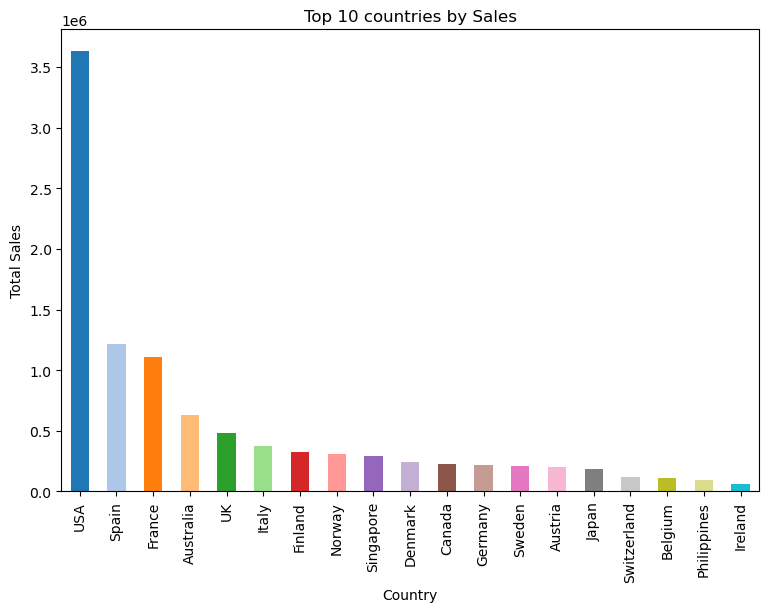

In [298]:
plt.figure(figsize=(9,6))
top_countries = df.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)
colors = plt.cm.tab20.colors  # You can also try 'Set3', 'Paired', 'Accent', etc.
top_countries.plot(kind='bar', color=colors[:len(top_countries)])
plt.title('Top 10 countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

In [300]:
dff.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP',
       'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2',
       'CITY', 'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'PRODUCTLINE_Motorcycles', 'PRODUCTLINE_Planes',
       'PRODUCTLINE_Ships', 'PRODUCTLINE_Trains',
       'PRODUCTLINE_Trucks and Buses', 'PRODUCTLINE_Vintage Cars',
       'DEALSIZE_Medium', 'DEALSIZE_Small', 'COUNTRY_Austria',
       'COUNTRY_Belgium', 'COUNTRY_Canada', 'COUNTRY_Denmark',
       'COUNTRY_Finland', 'COUNTRY_France', 'COUNTRY_Germany',
       'COUNTRY_Ireland', 'COUNTRY_Italy', 'COUNTRY_Japan', 'COUNTRY_Norway',
       'COUNTRY_Philippines', 'COUNTRY_Singapore', 'COUNTRY_Spain',
       'COUNTRY_Sweden', 'COUNTRY_Switzerland', 'COUNTRY_UK', 'COUNTRY_USA'],
      dtype='object')

### 4.4.3 Corelation Matrix

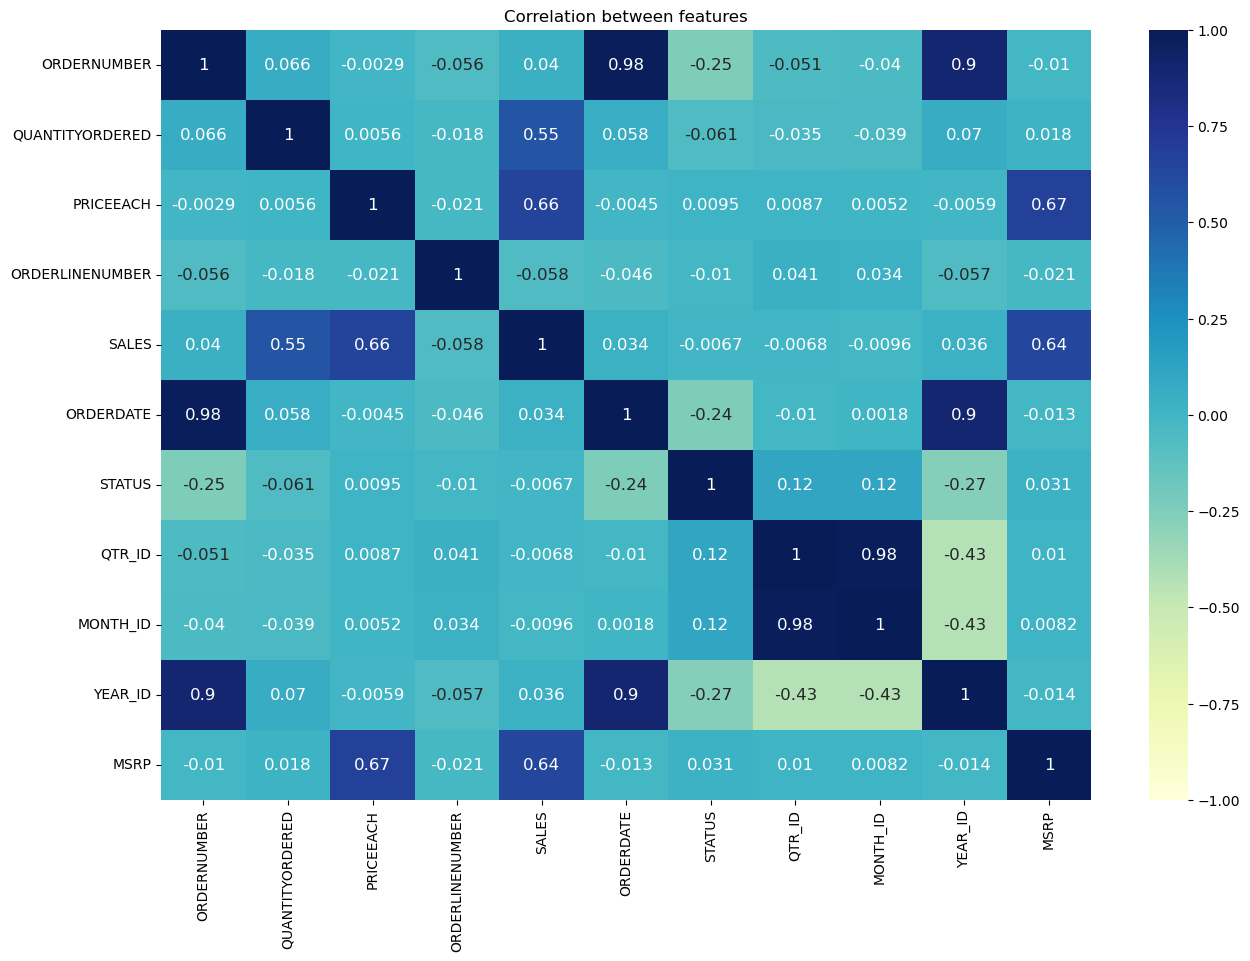

In [305]:
# To get a correlation matrix
# Plotting correlation plot
corr = dff.iloc[:, :11].corr()
plt.figure(figsize=(15, 10))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: set the font size of the annotation
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot=True, annot_kws={"size": 12})

# specify name of the plot
plt.title('Correlation between features')
plt.show()

### Observation

### 4.4.4 Pairplot

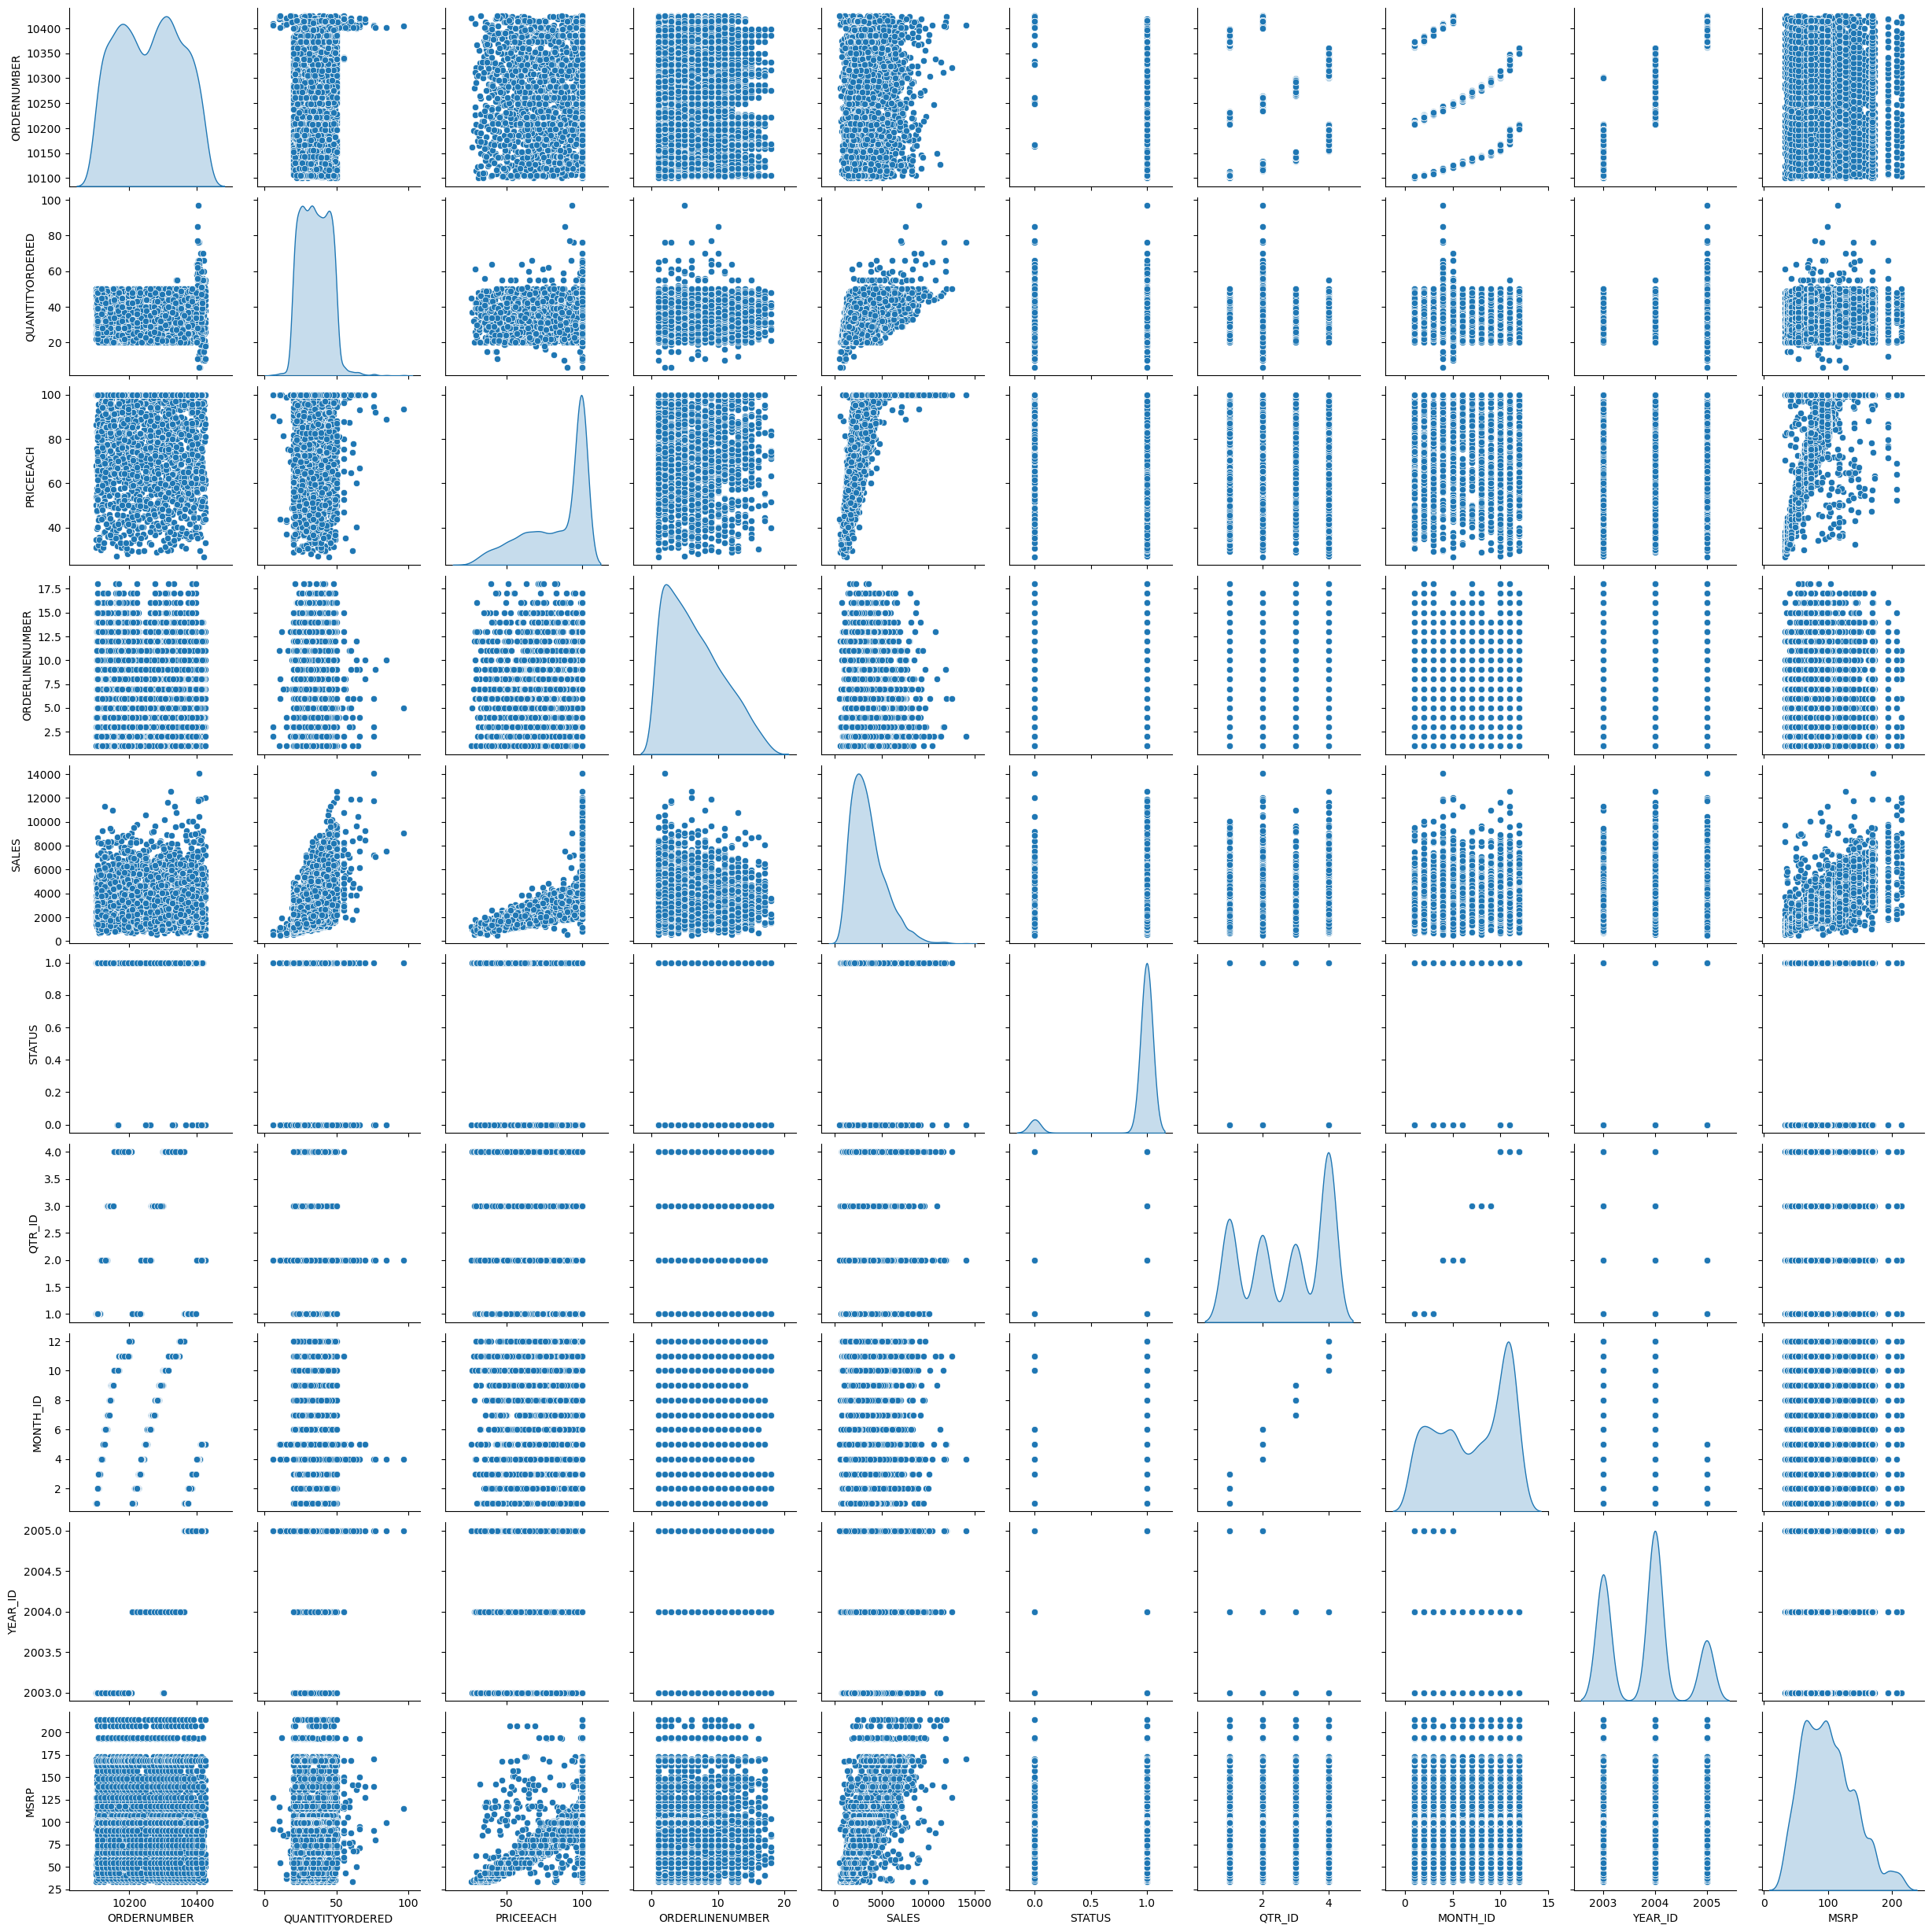

In [311]:
sns.pairplot(dff.iloc[:, :11], diag_kind='kde')
plt.show() # You might need this to display the plot

In [313]:
dff.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP',
       'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2',
       'CITY', 'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'PRODUCTLINE_Motorcycles', 'PRODUCTLINE_Planes',
       'PRODUCTLINE_Ships', 'PRODUCTLINE_Trains',
       'PRODUCTLINE_Trucks and Buses', 'PRODUCTLINE_Vintage Cars',
       'DEALSIZE_Medium', 'DEALSIZE_Small', 'COUNTRY_Austria',
       'COUNTRY_Belgium', 'COUNTRY_Canada', 'COUNTRY_Denmark',
       'COUNTRY_Finland', 'COUNTRY_France', 'COUNTRY_Germany',
       'COUNTRY_Ireland', 'COUNTRY_Italy', 'COUNTRY_Japan', 'COUNTRY_Norway',
       'COUNTRY_Philippines', 'COUNTRY_Singapore', 'COUNTRY_Spain',
       'COUNTRY_Sweden', 'COUNTRY_Switzerland', 'COUNTRY_UK', 'COUNTRY_USA'],
      dtype='object')

## 4.5 Data Prepration

In [317]:
cols_to_drop = ['ORDERNUMBER', 'STATUS', 'POSTALCODE', 'PRODUCTCODE', 'QTR_ID', 'ORDERDATE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'TERRITORY', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME']
df_final = dff.drop(cols_to_drop, axis=1)

In [319]:
df_final.columns

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MONTH_ID',
       'YEAR_ID', 'MSRP', 'PRODUCTLINE_Motorcycles', 'PRODUCTLINE_Planes',
       'PRODUCTLINE_Ships', 'PRODUCTLINE_Trains',
       'PRODUCTLINE_Trucks and Buses', 'PRODUCTLINE_Vintage Cars',
       'DEALSIZE_Medium', 'DEALSIZE_Small', 'COUNTRY_Austria',
       'COUNTRY_Belgium', 'COUNTRY_Canada', 'COUNTRY_Denmark',
       'COUNTRY_Finland', 'COUNTRY_France', 'COUNTRY_Germany',
       'COUNTRY_Ireland', 'COUNTRY_Italy', 'COUNTRY_Japan', 'COUNTRY_Norway',
       'COUNTRY_Philippines', 'COUNTRY_Singapore', 'COUNTRY_Spain',
       'COUNTRY_Sweden', 'COUNTRY_Switzerland', 'COUNTRY_UK', 'COUNTRY_USA'],
      dtype='object')

In [321]:
df_final.head(2)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,30,95.700,2,2871.000,2,2003,95,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,34,81.350,5,2765.900,5,2003,95,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [323]:
from sklearn.preprocessing import StandardScaler
features = df_final.columns
sc = StandardScaler()
df_scaled = sc.fit_transform(df_final)
data = pd.DataFrame(df_scaled, columns=df_final.columns)
data.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,-0.523,0.597,-1.057,-0.371,-1.393,-1.165,-0.142,2.744,-0.349,-0.301,-0.167,-0.345,-0.523,-0.981,1.096,-0.141,-0.109,-0.159,-0.151,-0.184,-0.354,-0.150,-0.075,-0.204,-0.137,-0.176,-0.096,-0.170,-0.371,-0.144,-0.105,-0.232,1.346
1,-0.112,-0.114,-0.347,-0.428,-0.572,-1.165,-0.142,2.744,-0.349,-0.301,-0.167,-0.345,-0.523,-0.981,1.096,-0.141,-0.109,-0.159,-0.151,-0.184,2.827,-0.150,-0.075,-0.204,-0.137,-0.176,-0.096,-0.170,-0.371,-0.144,-0.105,-0.232,-0.743
2,0.607,0.549,-1.057,0.179,-0.025,-1.165,-0.142,2.744,-0.349,-0.301,-0.167,-0.345,-0.523,1.020,-0.912,-0.141,-0.109,-0.159,-0.151,-0.184,2.827,-0.150,-0.075,-0.204,-0.137,-0.176,-0.096,-0.170,-0.371,-0.144,-0.105,-0.232,-0.743
3,1.017,-0.020,-0.110,0.105,0.248,-1.165,-0.142,2.744,-0.349,-0.301,-0.167,-0.345,-0.523,1.020,-0.912,-0.141,-0.109,-0.159,-0.151,-0.184,-0.354,-0.150,-0.075,-0.204,-0.137,-0.176,-0.096,-0.170,-0.371,-0.144,-0.105,-0.232,1.346
4,1.428,0.810,1.783,0.897,0.795,-1.165,-0.142,2.744,-0.349,-0.301,-0.167,-0.345,-0.523,1.020,-0.912,-0.141,-0.109,-0.159,-0.151,-0.184,-0.354,-0.150,-0.075,-0.204,-0.137,-0.176,-0.096,-0.170,-0.371,-0.144,-0.105,-0.232,1.346


## 5.K-Mean Clustring(Elbow methord)

In [327]:
from sklearn.cluster import KMeans

# Using the elbow method to find the optimal number of clusters

wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

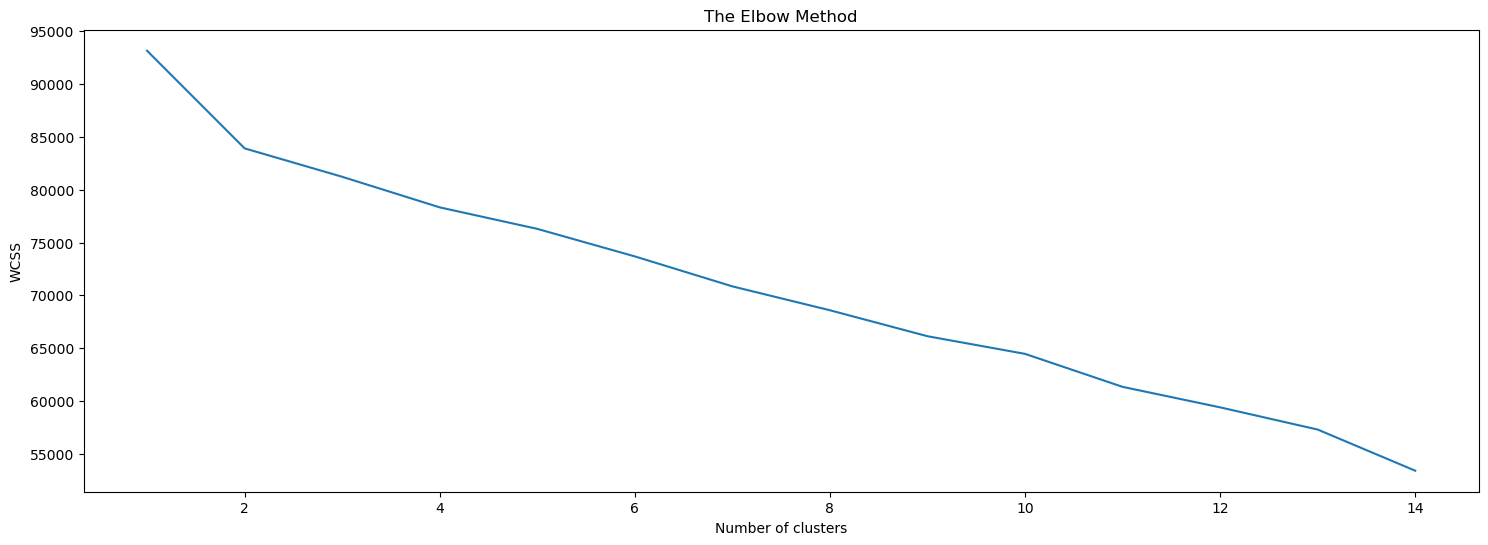

In [329]:
# Plot the graph to visualize the optimal number of clusters through the Elbow Method
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [331]:
# Using silhouette score: Higher the value, better the cluster. Earlier run suggested 3
from sklearn.metrics import silhouette_score

# create a list for different values of K
n_clusters = [3, 4, 5, 6, 7, 8]

# use 'for' loop to build the clusters
# 'random_state' creates the sample in the same order
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans(n_clusters=K, random_state=10, n_init=10)
    predict = cluster.fit_predict(data)
    score = silhouette_score(data, predict, random_state=10)
    print(f"For n_clusters = {K}, silhouette score is {score}")

For n_clusters = 3, silhouette score is 0.12153197298936343
For n_clusters = 4, silhouette score is 0.12982394883635748
For n_clusters = 5, silhouette score is 0.1362671151430529
For n_clusters = 6, silhouette score is 0.10340652885169938
For n_clusters = 7, silhouette score is 0.10941286979279208
For n_clusters = 8, silhouette score is 0.11895815488110503


In [333]:
# Run k-means cluster algo
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=100, n_init=10, random_state=0)
kmeans = kmeans.fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

[[-2.39808422e-01  7.14982608e-02 -1.27239657e-01 -1.91560871e-01
   1.89623135e-01  1.41799615e-01 -3.87848983e-02 -3.20047419e-01
   1.10852821e-01  4.24745607e-01 -1.67453834e-01  3.95118324e-01
  -1.78603818e-03 -3.76671870e-02  1.20827398e-01 -1.40960782e-01
  -1.08756411e-01  6.27124959e+00 -1.51083047e-01 -1.83540987e-01
  -3.53764699e-01 -1.49852034e-01 -7.54985803e-02 -2.04199454e-01
  -1.36988279e-01 -1.76194660e-01 -9.64140754e-02 -1.69676420e-01
  -3.71278389e-01 -1.43552692e-01 -1.05371495e-01 -2.31843481e-01
  -7.42934467e-01]
 [ 3.91219319e-01  5.85646830e-01 -4.04565457e-02  6.76859748e-01
  -1.46515748e-02  1.13295496e-02  4.96039850e-01  5.49220477e-02
  -5.25343620e-02 -3.29360466e-02 -3.58984982e-02 -3.45470292e-01
  -1.91721961e-02  7.98999556e-01 -9.12100499e-01  3.13042777e-02
   2.00092964e-03 -1.59457854e-01  3.69713804e-02  1.31290706e-02
   1.98181194e-02  2.34330830e-02 -1.49424273e-03 -2.04199454e-01
  -1.36988279e-01  4.93048921e-03  2.82090633e-02 -3.9749

In [335]:
# add a column 'cluster' in the data giving cluster number corresponding to each observation
df_final['cluster'] = kmeans.labels_
df_final.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,cluster
0,30,95.700,2,2871.000,2,2003,95,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,3
1,34,81.350,5,2765.900,5,2003,95,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,3
2,41,94.740,2,3884.340,7,2003,95,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,1
3,45,83.260,6,3746.700,8,2003,95,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1
4,49,100.000,14,5205.270,10,2003,95,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1


In [337]:
df_final['cluster'].value_counts()

cluster
1    1260
3    1049
5     279
2     113
0      70
4      52
Name: count, dtype: int64

In [347]:
df_final[df_final.cluster==0].describe()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,cluster
count,70.000,70.000,70.000,70.000,70.000,70.000,70.000,70.000
mean,32.757,85.101,5.929,3201.122,7.786,2003.914,99.157,0.000
std,7.599,18.731,3.440,1442.516,2.853,0.583,36.378,0.000
min,20.000,35.350,1.000,1119.930,4.000,2003.000,37.000,0.000
25%,27.000,72.653,3.000,2098.587,5.000,2004.000,72.000,0.000
50%,33.500,93.540,6.000,2982.950,8.000,2004.000,99.000,0.000
75%,38.000,100.000,8.750,3943.057,10.000,2004.000,121.000,0.000
max,50.000,100.000,14.000,9064.890,12.000,2005.000,214.000,0.000


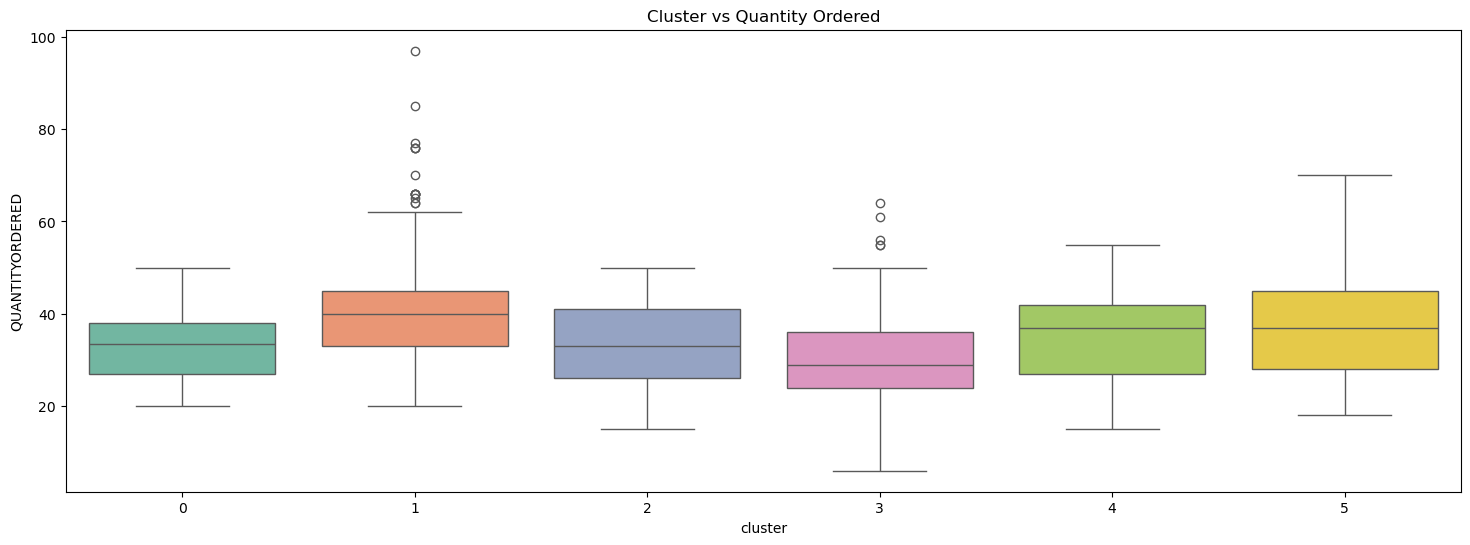

In [353]:
sns.boxplot(x=df_final['cluster'], y=df_final['QUANTITYORDERED'], palette='Set2')
plt.title('Cluster vs Quantity Ordered')
plt.show()

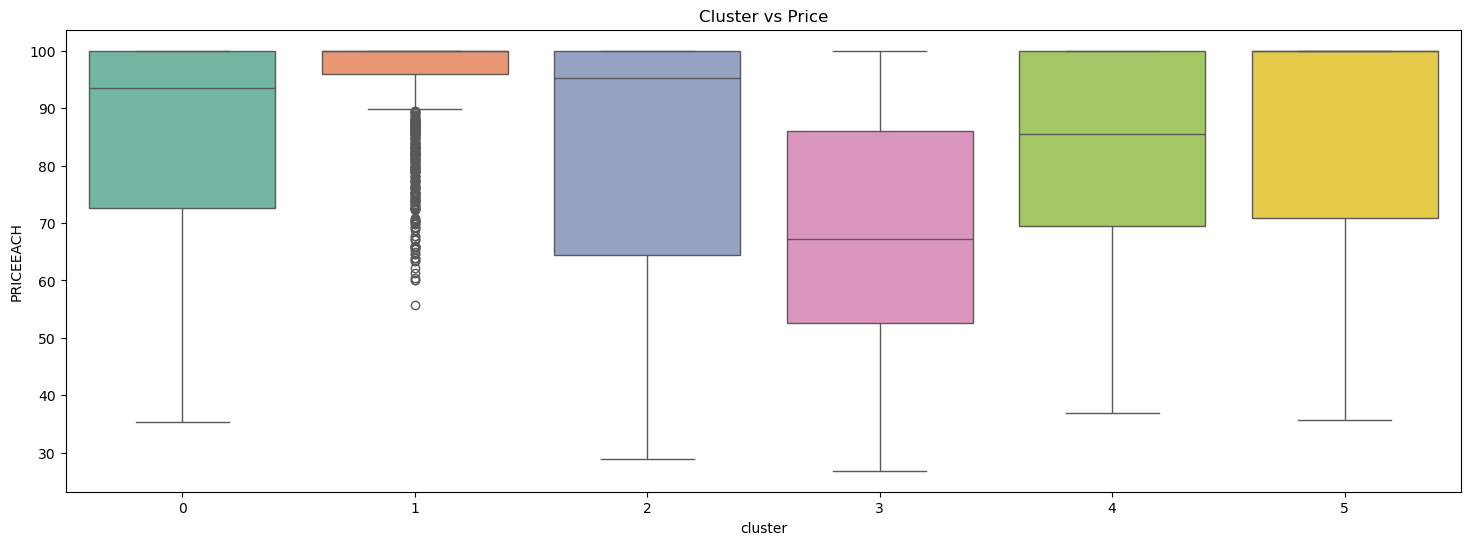

In [361]:
sns.boxplot(x=df_final['cluster'], y=df_final['PRICEEACH'], palette='Set2')
plt.title('Cluster vs Price')
plt.show()

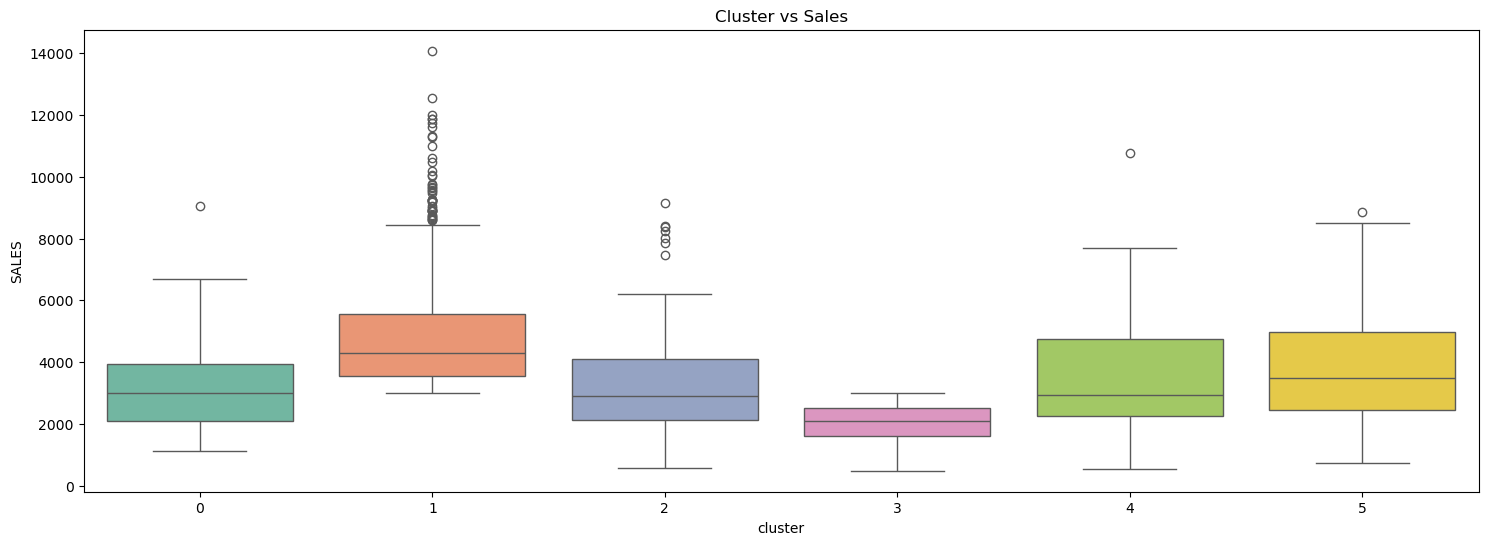

In [357]:
sns.boxplot(x=df_final['cluster'], y=df_final['SALES'], palette='Set2')
plt.title('Cluster vs Sales')
plt.show()

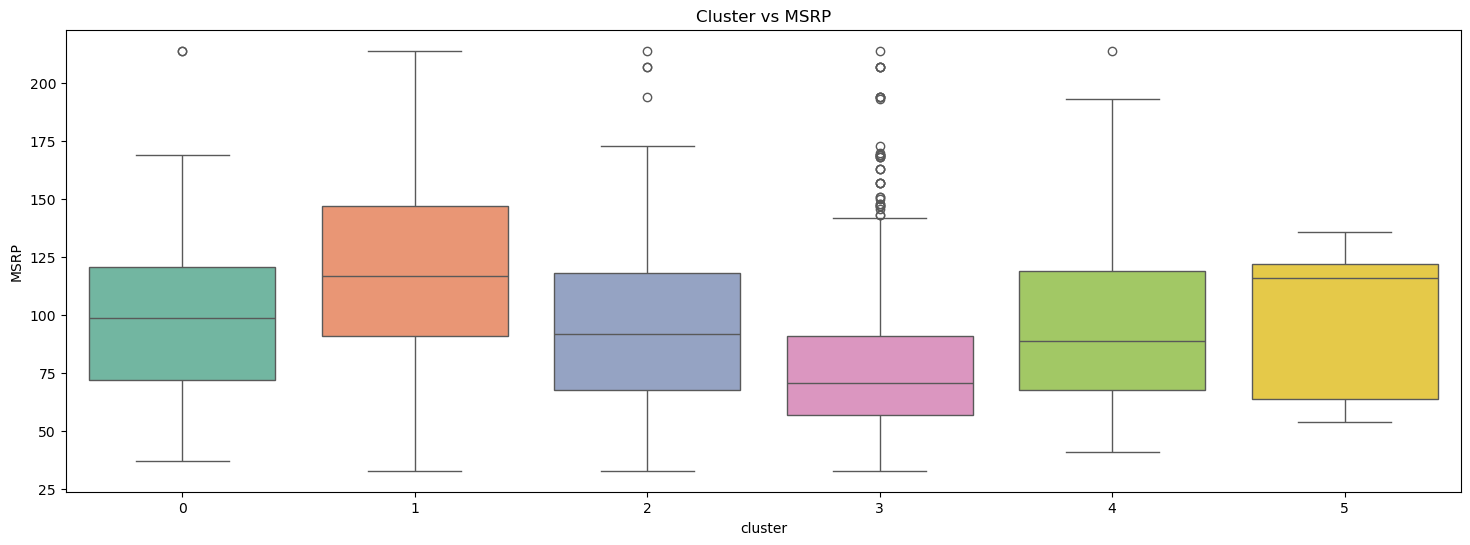

In [359]:
sns.boxplot(x=df_final['cluster'], y=df_final['MSRP'], palette='Set2')
plt.title('Cluster vs MSRP')
plt.show()

In [363]:
pd.crosstab(df_final['cluster'], df_final['MONTH_ID'])

MONTH_ID,1,2,3,4,5,6,7,8,9,10,11,12
cluster,,,,,,,,,,,,
0,0,0,0,12,9,9,0,14,0,11,4,11
1,94,111,106,81,109,58,61,82,64,155,259,80
2,0,18,0,0,14,0,15,17,9,0,40,0
3,86,75,87,73,86,46,47,64,76,126,217,66
4,26,0,0,4,0,6,0,0,0,0,16,0
5,23,20,19,8,34,12,18,14,22,25,61,23


In [365]:
pd.crosstab(df_final['cluster'], df_final['PRODUCTLINE_Ships'])

PRODUCTLINE_Ships,False,True
cluster,,
0,56,14
1,1167,93
2,107,6
3,933,116
4,47,5
5,279,0


## 6.Hireichal Custring

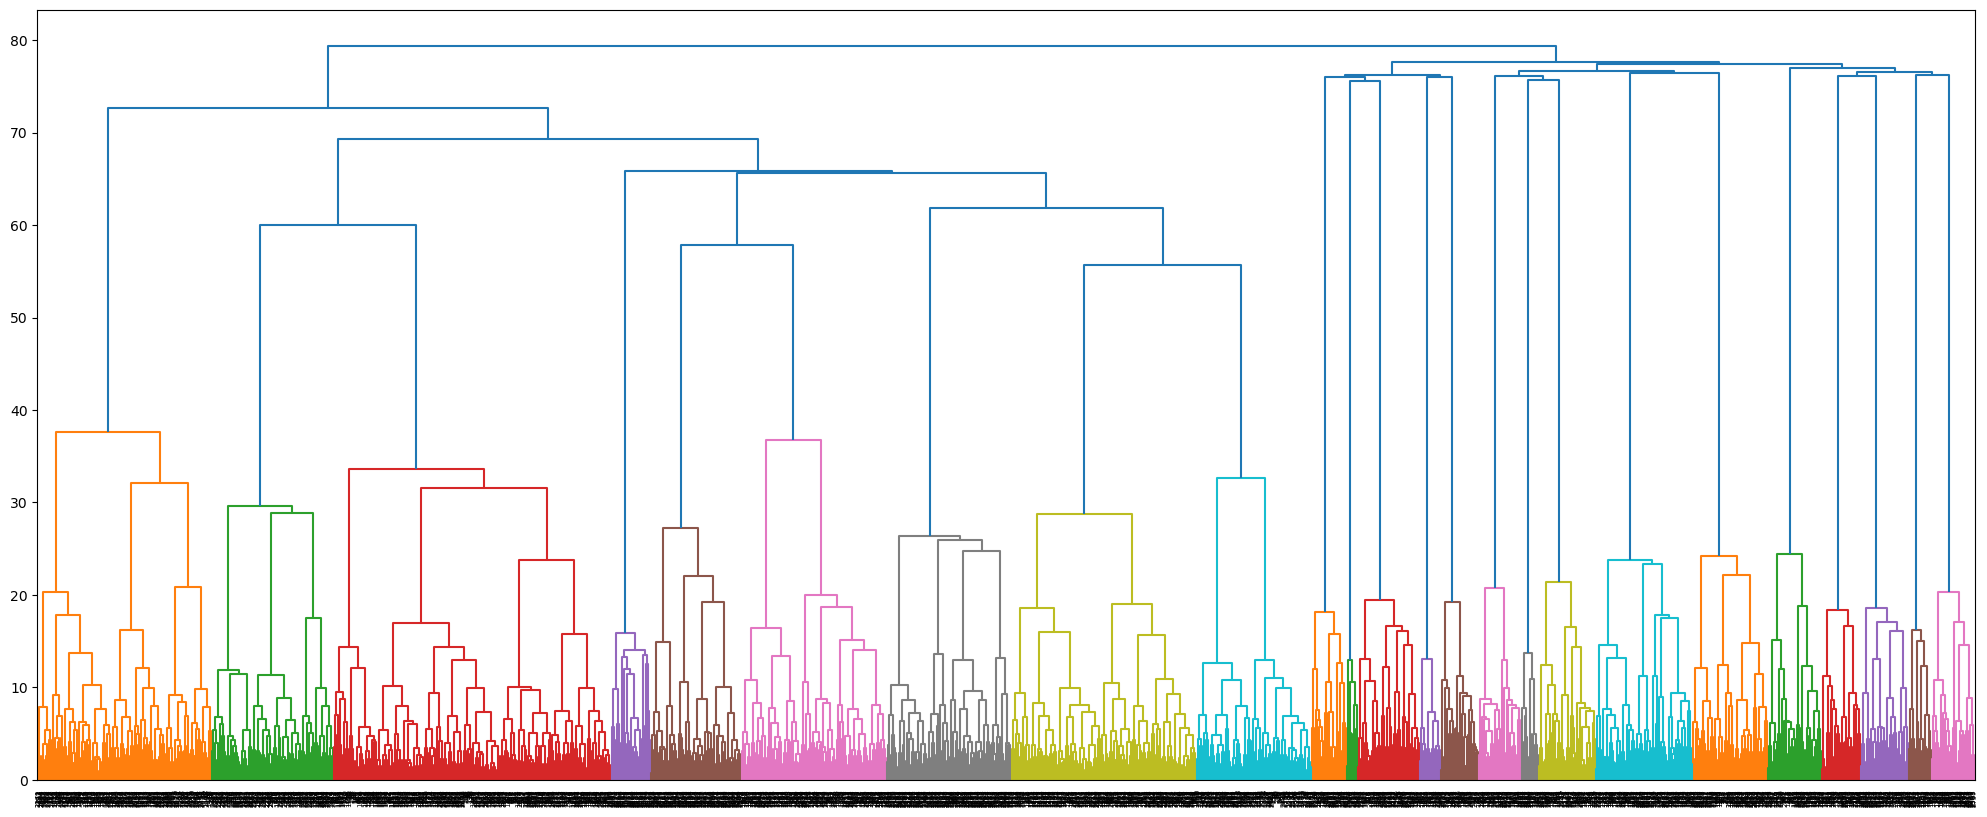

In [369]:
# generate the linkage matrix
Z = linkage(data, 'ward', metric='euclidean')
Z.shape

plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

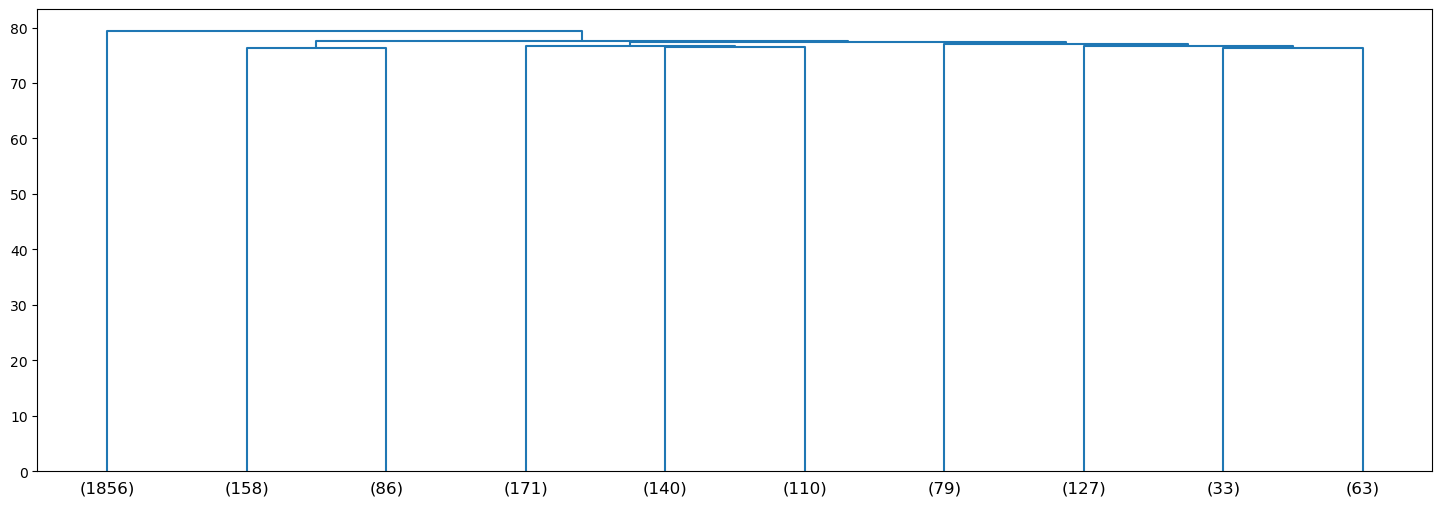

In [371]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,                   # show only the last p merged clusters
)
plt.show()

In [373]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

orig_dists = distance.pdist(data) # Matrix of original distances between observations
cophe_dists = hierarchy.cophenet(Z) # Matrix of cophenetic distances between observations

corr_coef = np.corrcoef(orig_dists, cophe_dists)[0,1]

corr_coef

0.5838703081746428

#### We can see 5 to 6 distinct clusturs

In [378]:
# Generate cluster labels
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

cluster_hc = AgglomerativeClustering(n_clusters=6, linkage='ward')
labels_hc = cluster_hc.fit_predict(data)


In [380]:
df_final['label_hc'] = labels_hc
df_final.head(2)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,cluster,label_hc
0,30,95.700,2,2871.000,2,2003,95,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,3,3
1,34,81.350,5,2765.900,5,2003,95,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,3,3


In [384]:
df_final['label_hc'].value_counts()

label_hc
3    1856
1     250
2     244
0     223
5     171
4      79
Name: count, dtype: int64

## 9. Conclusion and Inferences